<a href="https://colab.research.google.com/github/zronyj/fisicoquimica/blob/master/Cuantica/Atomo_de_Hidrogeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¡Te volvemos a dar la bienvenida a otro cuaderno interactivo de Colaboratory!

En esta ocasión vamos a realizar un análisis de los orbitales del átomo de hidrógeno. Para ello vamos a utilizar varios enfoques y varios programas, dado que esto ya sienta las bases para la química computacional.

Vamos a comenzar importando librerías y definiendo algunas funciones que nos permitirán un cambio de coordenadas y una operación matemática particular: el factorial.

In [0]:
%matplotlib inline
import numpy as np
import scipy.special as spe
import scipy.constants as cnts
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
# Cambio de coordenadas de cartesianas a esfericas
rho = lambda x, y, z: (x**2 + y**2 + z**2)**0.5
theta = lambda x, y: np.arctan(y/x)
phi = lambda x, y, z: np.arctan((x**2 + y**2)**0.5 / z)

# Funcion para calcular factorial n!
factorial = lambda n: np.prod( np.array( [i for i in range(1,n)] ) )

## Definiciones
Lo primero que tenemos que tener claro es el concepto de que el electrón lo estamos modelando con una función de onda $\psi \left( r, \theta, \phi \right)$. Los parámetros $r, \theta, \phi$ sustituyen a los tradicionales cartesianos $x, y, z$ porque la ecuación de Schrödinger para el átomo de hidrógeno es más fácil de resolverse en coordenadas esféricas. Como ya has de haber visto en el curso, la ecuación de Schrödinger entonces se separa en una función  $R \left( r \right)$ para el radio $r$, una función $S \left( \theta \right)$ para el ángulo polar $\theta$ y una función $T \left( \phi \right)$ para el ángulo azimutal $\phi$. Ahora vamos a comenzar a analizar una por una.

### Función de onda radial (R)
Al resolver la ecuación de Schrödinger para la parte radial, la función de onda $R \left( r \right)$ queda definida de la siguiente manera:

$$R_{n,l} \left( r \right) = \sqrt{ \left( \frac{2}{n} \right)^{3} \frac{\left(n - l - 1\right)!}{2 n \left(n + l\right)!} } \left( \frac{2r}{n} \right)^{l} L_{n-l-1}^{2l+1} \left[ \frac{2r}{n} \right] e^{-\frac{r}{n}}$$

Vale la pena mencionar que $n$ y $l$ son el número cuántico principal y el número cuántico de momento angular.

$n$ comprende el conjunto de los números naturales $n = 1, 2, 3, ...$

$l$ toma los valores enteros $l \leq n - 1$.

$L_{n-l-1}^{2l+1}$ es el polinomio asociado de Laguerre tomando como argumento $\left( \frac{2r}{n} \right)$.

Entonces, para definir las funciones en código y lograr hacer algo con ellas, la función de onda radial se escribirá de la siguiente manera:

In [0]:
def R(n, l, r):
    rho = 2. * r / n
    el = rho**l
    N_ln = float(factorial(n - l - 1) / (n**4 * factorial(l + n)))**0.5
    L_nl = spe.assoc_laguerre(rho, l, n) # Polinomio asociado de Laguerre
    return 2 * N_ln * el * L_nl * np.exp(-rho/2.)

### Función de onda polar (S)
Ahora que ya contamos con la función de onda radial, definimos la función de onda polar $S \left( \theta \right)$ de la siguiente manera:

$$S_{l,m} \left( \theta \right) = \sqrt{ \left( \frac{2l+1}{2} \right) \frac{\left(l - \left| m \right| \right)!}{\left(l + \left| m \right| \right)!} } P_{l}^{\left| m \right|} \left[ \cos \left( \theta \right) \right]$$

En este caso, el número cuántico angular $l$, que toma valores $l \leq n-1$, es acompañado del número cuántico magnético $m$, el cual toma valores de $-l \leq m \leq l$. La función $P_{l}^{\left| m \right|}$ es el polinomio asociado de Legendre aplicado a $\cos \left( \theta \right)$. En código, definimos la función como a continuación:

In [0]:
def S(x, y, l, m):
    N_lm = ( (2*l + 1)/2. * float(factorial(l - abs(m)))/factorial(l + abs(m)) )**0.5
    t = theta(x, y)
    P_lm = spe.lpmv(m, l, np.cos(t)) # Polinomio asociado de Legendre
    return N_lm * P_lm

### Función de onda azimutal (T)
Finalmente, pasamos a la función de onda azimutal $T \left( \phi \right)$. Esta se define de la siguiente manera:

$$T_{m} \left( \phi \right) = \frac{1}{\sqrt{2 \pi}} e^{i m \theta}$$

Otra vez, resaltamos que $m$ es el número cuántico magnético. Esta función se escribe en código como se muestra aquí:

In [0]:
def T(x, y, z, m):
    p = phi(x, y, z)
    return np.exp(m*p*1.j) / (2*np.pi)**0.5

### Armónicos esféricos
Al explorar la literatura, muchas veces no se encuentra referencia a las dos funciones previamente definidas, sino a una función un poco más misteriosa llamada los *armónicos esféricos* la cual es representada por $Y^{m}_{l} \left(\theta, \phi \right)$. Esta función no tiene **nada** de misterioso, pues simplemente es el producto de $S_{l,m} \left( \theta \right)$ y de $T_{m} \left( \phi \right)$. Naturalmente, su definición es la siguiente:

$$Y^{m}_{l} \left(\theta, \phi \right) = S_{l,m} \left( \theta \right) T_{m} \left( \phi \right) = \sqrt{ \left( \frac{2l+1}{4 \pi} \right) \frac{\left(l - \left| m \right| \right)!}{\left(l + \left| m \right| \right)!} } P_{l}^{\left| m \right|} \left[ \cos \left( \theta \right) \right] e^{i m \theta}$$

Para fines prácticos, la definiremos también en código:

In [0]:
def Y(x, y, z, l, m):
  s = S(x, y, l, m)
  t = T(x, y, z, m)
  return s * t

### Función de onda del átomo de hidrógeno
De igual manera, y para volver a la primera definición, la función de onda completa para el átomo de hidrógeno es el producto de la función de onda radial $R_{n,l} \left( r \right)$ y los armónicos esféricos $Y_{l}^{m} \left( \theta, \phi \right)$. Como es muy poco común encontrar la función dee onda del átomo de hidrógeno completa, representada de manera general, esta se incluirá aquí solo para fines de apreciación.

$$\psi_{n,l,m} \left(r, \theta, \phi \right) = \sqrt{ \left( \frac{2 l+1}{n^{4} \pi} \right) \frac{\left(n - l - 1\right)!}{ \left(n + l\right)!} \frac{\left(l - \left| m \right| \right)!}{\left(l + \left| m \right| \right)!}} \left( \frac{2r}{n} \right)^{l} L_{n-l-1}^{2l+1} \left[ \frac{2r}{n} \right] P_{l}^{\left| m \right|} \left[ \cos \left( \theta \right) \right] e^{i m \theta -\frac{r}{n}}$$

Nuevamente para fines prácticos de código, la función de onda, y la misma elevada al cuadrado, se definirán como se muestra en la siguiente celda:

In [0]:
def Psi(x, y, z, n, l, m):
  r = rho(x, y, z)
  return R(n, l, r) * Y(x, y, z, l, m)

def Psi2(x, y, z, n, l, m):
  r = rho(x, y, z)
  return (R(n, l, r) * Y(x, y, z, l, m))**2

## Visualización de orbitales
Dado que ya quedó definida la función de onda para el átomo de hidrógeno, ahora es momento de estudiar cómo es que esta se ve y las implicaciones que tienen sus formas en el espacio. A partir de este momento, quedarán definidas una serie de funciones en el cuaderno, cuya finalidad es usarlas, no modificarlas.

### Función de onda radial
Lo primero que se intentará visualizar es la función radial del átomo de hidrógeno para diferentes números cuánticos. Para ello vamos a definir una función:

In [0]:
def orbital_r(n, l, d=[-1,5,0.1], a=[-0.2,1]):
    x = np.arange(0, d[1]+0.5, d[2])
    vr = np.vectorize(R)
    y = vr(n, l, x)
    y2 = vr(n, l, x)**2
    plt.title("Funcion de onda radial del atomo de hidrogeno $H$")
    plt.plot(x, y, "r--", label="$R$")
    plt.plot(x, y2, "b-", label="$R^2$")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes = plt.gca()
    axes.set_ylim([a[0], a[1]])
    axes.set_xlim([d[0], d[1]])
    plt.xlabel('Distancia desde el nucleo $r$')
    plt.ylabel('Valor de la funcion $R_{n,l} (r)$ y $[ R_{n,l} (r) ]^{2}$')
    plt.grid(True)
    plt.show()

Ahora lo que queda es utilizarla. Se recomiendan las siguientes combinaciones de números cuánticos y parámetros para la función:

* `n=1, l=0, d=[-0.5,5,0.1], a=[-0.2,4]`
* `n=2, l=0, d=[-0.5,20,0.1], a=[-0.4,0.6]`
* `n=2, l=1, d=[-0.5,20,0.1], a=[-0.4,0.6]`
* `n=3, l=0, d=[-0.5,50,0.1], a=[-0.3,0.5]`
* `n=3, l=1, d=[-0.5,50,0.1], a=[-0.3,0.5]`
* `n=3, l=2, d=[-0.5,50,0.1], a=[-0.3,0.5]`

También es importante mencionar que se debe poner especial atención a `d` y a `a`, pues estas determinan el tamaño del área donde se está graficando. Esto puede dar mucha información sobre la forma de las funciones de onda y su distribución de probabilidad.

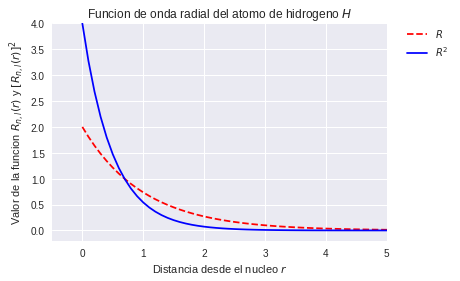

In [9]:
orbital_r(n=1, l=0, d=[-0.5,5,0.1], a=[-0.2,4])

Notemos que estas funciones siempre parten de `0`, pues el eje $x$ representa la distancia del electrón desde el núcleo en cualquier dirección. Esto significa que para lograr una función de $-\infty$ a $\infty$, la función $R_{n,l}$ tendría que tomarse positiva para valores positivos de $r$, y negativa para los valores negativos de $r$. Esto significa que la función real se tendría que ver de la siguiente manera:

$$R_{n,l} \left(r\right) = \begin{cases} R_{n,l} \left(r\right) & r = [0, \infty)\\
-R_{n,l} \left(-r\right) & r = (-\infty, 0]\end{cases}$$

En código, esto significaría que la misma función que ya se tiene evaluada, solo se tomaría invertida para los valores negativos. Ya llegaremos a esto en un momento. Por ahora, vamos a dar paso a visualizar las funciones de onda ya con los armónicos esféricos.

### Orbitales del átomo de hidrógeno en secciones transversales 2D

En este caso, lo que vamos a visualizar serán cortes transversales del orbital tridimensional en cuestión. Para ello, estaremos trabajando con la función de onda elevada al cuadrado; la probabilidad electrónica en el espacio. 

In [0]:
def orbital2D(n=1, l=0, m=0, d=[-4,4,40]):
    x = np.linspace(d[0], d[1], d[2])
    y = np.linspace(d[0], d[1], d[2])
    z = np.linspace(d[0], d[1], d[2])
    Xi, Yi, Zi = np.meshgrid(x, y, z)
    vf = np.vectorize(Psi2)
    orb = vf(x=Xi, y=Yi, z=Zi, n=n, l=l, m=m)
    orb = np.real(orb)
    plano_xz = orb[:,:,int(d[2]/2)]
    plano_yz = orb[:,int(d[2]/2),:]
    plano_xy = orb[int(d[2]/2),:,:]
    fig = plt.figure(dpi=150)

    ax = fig.add_subplot(221)
    ax.title.set_text("Eje X - plano yz")
    plt.contourf(y, z, plano_yz, 20, cmap=cm.viridis)
    plt.colorbar()

    ay = fig.add_subplot(222)
    ay.title.set_text("Eje Y - plano xz")
    plt.contourf(x, z, plano_xz, 20, cmap=cm.viridis)
    plt.colorbar()

    az = fig.add_subplot(223)
    az.title.set_text("Eje Z - plano xy")
    plt.contourf(x, y, plano_xy, 20, cmap=cm.viridis)
    plt.colorbar()

    fig.tight_layout()
    fig.set_size_inches(w=5.4,h=4.4)
    fig.show()

Al igual que con el ejercicio anterior, se recomiendan las siguientes combinaciones de números cuánticos:
* `n=1, l=0, m=0`
* `n=2, l=0, m=0, d=[-20, 20, 40]`
* `n=2, l=1, m=0, d=[-20, 20, 40]`
* `n=2, l=1, m=-1, d=[-20, 20, 40]`
* `n=2, l=1, m=1, d=[-40, 40, 80]`
* `n=3, l=2, m=0, d=[-40, 40, 80]`
* `n=3, l=2, m=-1, d=[-40, 40, 80]`

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


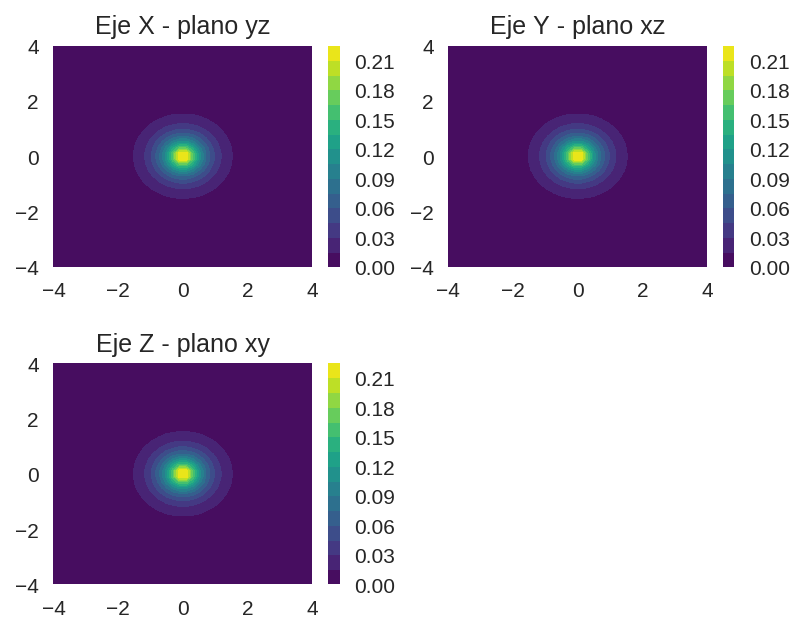

In [11]:
%matplotlib inline
orbital2D(n=1, l=0, m=0)

Es claro que lo que vimos en estas representaciones difiere de lo que solemos ver en libros excepto por los orbitales *s* (aquellos donde $l$ y $m$ son 0). ¿Podrá tratarse de una falta de comprensión debido a que se está analizando solo los cortes transversales? Para resolver eso, habría que graficar los orbitales en 3 dimensiones completamente. Esta tarea ya no la puede realizar Colaboratory. Es por ello que vamos a trabajar con VMD.

### Orbitales del átomo de hidrógeno en 3 dimensiones

VMD significa **V**isual **M**olecular **D**ynamics, y fue creado para visualizar moléculas de gran tamaño, complejidad y moléculas en movimiento. De todos los formatos que podemos abrir con VMD, vamos a trabajar con un formato `.cub`

Para generar documentos en formato `.cub` vamos a definir otra función. Esta, al utilizarla, nos dará todo lo necesario para los documentos en este formato.

In [0]:
def orbital3D(orbreal="", n=1, l=0, m=0, lims=[-4,4], mesh=0.2):
    BOHR = 1.0 / 0.5291772083 # Radio de Bohr
    D = [lims[1] - lims[0] for i in range(3)] # Definir distancias en 3 ejes
    d = [int(r / mesh) for r in D] # Definir numero de puntos en 3 ejes
    x = np.linspace(lims[0], lims[1], d[0]) # Espacio lineal en eje X
    y = np.linspace(lims[0], lims[1], d[1]) # Espacio lineal en eje Y
    z = np.linspace(lims[0], lims[1], d[2]) # Espacio lineal en eje Z
    Xi, Yi, Zi = np.meshgrid(x, y, z) # Construccion de la red 3D
    # Aplicando la funcion a la red 3D segun orbitales reales
    if orbreal != "":
        ncte = 1/2**0.5
        vf = np.vectorize(Psi) # Vectorizar la funcion
        if orbreal == "py":
            orb = ncte * (vf(x=Xi, y=Yi, z=Zi, n=2, l=1, m=-1) -
                          vf(x=Xi, y=Yi, z=Zi, n=2, l=1, m=1))
        elif orbreal == "px":
            orb = 1.j * ncte * (vf(x=Xi, y=Yi, z=Zi, n=2, l=1, m=-1) +
                                vf(x=Xi, y=Yi, z=Zi, n=2, l=1, m=1))
        elif orbreal == "pz":
            orb = vf(x=Xi, y=Yi, z=Zi, n=2, l=1, m=0)
        elif orbreal == "dx2-y2":
            orb = ncte * (vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=2) +
                          vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=-2))
        elif orbreal == "dxy":
            orb = ncte/1.j * (vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=2) -
                              vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=-2))
        elif orbreal == "dxz":
            orb = ncte/1.j * (vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=1) +
                              vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=-1))
        elif orbreal == "dyz":
            orb = ncte * (vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=1) -
                          vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=-1))
        elif orbreal == "dz2":
            orb = vf(x=Xi, y=Yi, z=Zi, n=3, l=2, m=0)
        else:
            print "El parametro ingresado no se reconoce.\nGraficando orbitales por defecto."
            orb = vf(x=Xi, y=Yi, z=Zi, n=n, l=l, m=m)
        orb = orb**2
    else:
        vf = np.vectorize(Psi2) # Vectorizar la funcion
        orb = vf(x=Xi, y=Yi, z=Zi, n=n, l=l, m=m) # Aplicar funcion a la red 3D
    orb = np.real(orb)
    cl = ['Cube file made with PyChemT by Rony J. Letona\n',
          'Grid built to show the orbitals of the H atom\n',
          '\t{0}\t{1:12.6f}\t{2:12.6f}\t{3:12.6f}\n'.format(1, lims[0]*BOHR,
                                                            lims[0]*BOHR, lims[0]*BOHR),
          '\t{0}\t{1:12.6f}\t{2:12.6f}\t{3:12.6f}\n'.format(d[0], BOHR*D[0]/(d[0]-1), 0.0, 0.0),
          '\t{0}\t{1:12.6f}\t{2:12.6f}\t{3:12.6f}\n'.format(d[1], 0.0, BOHR*D[1]/(d[1]-1), 0.0),
          '\t{0}\t{1:12.6f}\t{2:12.6f}\t{3:12.6f}\n'.format(d[2], 0.0, 0.0, BOHR*D[2]/(d[2]-1)),
          '\t{0}\t{1:12.6f}\t{2:12.6f}\t{3:12.6f}\t{4:12.6f}\n'.format(1, 1, 0, 0, 0)]
    temp = ''
    for i in range(d[0]):
        for j in range(d[1]):
            for k in range(d[2]):
                temp += '{0:13.5e}\t'.format(orb[i][j][k] * 10**3)
                if ((i*d[1] + j)*d[2] + k + 1) % 6 == 0:
                    temp += '\n'
            temp += '\n'
    cl.append(temp)
    if orbreal != "":
        fname = "[H]_{0}.cub".format(orbreal)
    else:
        fname = "[H]_n{0}_l{1}_m{2}.cub".format(n, l, m)
    with open(fname, 'w') as f:
        f.writelines(cl)

Para utilizar esta función, vamos a darle los números cuánticos que deseamos y posteriormente vamos a ejecutarla. La función **NO** nos va a devolver algo esta vez. Lo que realmente está pasando es que esta está creando documentos `.cub` en Colaboratory. En seguida te decimos cómo descargarlos. Por el momento, conviene que corras la función con los siguientes números cuánticos:
* `n=1, l=0, m=0`
* `n=2, l=1, m=-1`
* `n=2, l=1, m=0`
* `n=2, l=1, m=1`
* `n=3, l=2, m=-2`
* `n=3, l=2, m=-1`
* `n=3, l=2, m=0`
* `n=3, l=2, m=1`
* `n=3, l=2, m=2`

In [0]:
orbital3D(n=1, l=0, m=0)

Para obtener los documentos generados, vamos a la pestaña negra, con una pequeña flecha blanca, que se halla en el borde izquierdo de nuestro cuaderno interactico. Presionamos y nos dirigimos a *Files*. Allí hemos de encontrar los documentos `[H]_nX_lX_mX.cub` que hemos generado previamente. Para descargarlos, hacemos doble click en cada uno.

Una vez descargados los documentos `.cub`, nos dirigimos a la carpeta en donde estos se encuentran en nuestro ordenador, y a la par de los documentos creamos uno nuevo llamado `loader.vmd` Este último debe de llevar el siguiente código dentro de él:

`foreach i in $argv {`

    mol new $i

`}`

Una vez terminado este documento, procedemos a abrir una línea de comando (Terminal) en la carpeta en donde se halla todo esto y a correr el comando:

`vmd -e loader.vmd -argv *.cub`

Esto inmediatamente nos ayudará a cargar todos los documentos a VMD.

Para poder visualizar los orbitales que generamos, debemos seguir las siguientes instrucciones:

#### Instrucciones
1. Ir a la opción *Display*
  - Activar *Culling*
  - Ir a *Rendermode* y seleccionar *GLSL*
2. Ir a la opción *Graphics*
  - Abrir la ventana *Representations...*
    * Seleccionar una molécula para trabajar con ella (e.g. `[H]_n2_l1_m-1.cub`)
    * Cambiar la selección en *Coloring method*, a **ColorID**
    * En el menu de al lado derecho, seleccionar un color
    * En *Material*, seleccionar **BlownGlass**
    * En *Drawing method*, seleccionar **IsoSurface**
    * En *Show*, seleccionar **IsoSurface**
    * En *Draw*, seleccionar **Solid Surface**
    * Mover el carrito en *Isovalue* hasta visualizar los orbitales
  - Repetir los mismos pasos anteriores para la siguiente molécula en *Representations...*
    * Para evitar superponer tantos orbitales uno sobre otro, hacer doble click en la letra **D** que se halla al lado izquierdo del nombre de la molécula en la ventana `VMD Main`
3. Al haber logrado graficar los orbitales, vamos a activar algunos al mismo tiempo para comprender cómo es que se encuentran los electrones en el átomo de hidrógeno
  - Activar (mediante la letra **D** a la par del nombre) los siguientes grupos de moléculas y analizar
    * Orbital S:
      - `[H]_n1_l0_m0.cub`
    * Orbitales P:
      - `[H]_n2_l1_m-1.cub`
      - `[H]_n2_l1_m0.cub`
      - `[H]_n2_l1_m1.cub`
    * Orbitales D:
      - `[H]_n3_l2_m-2.cub`
      - `[H]_n3_l2_m-1.cub`
      - `[H]_n3_l2_m0.cub`
      - `[H]_n3_l2_m1.cub`
      - `[H]_n3_l2_m2.cub`
  - ¿Son estos orbitales parecidos a lo que hemos visto en la literatura?

La respuesta es obvia: no lo son. Y es que estos orbitales son la solución tal cual de la función de onda del átomo de hidrógeno para determinados números cuánticos. Esta solo fue elevada al cuadrado, pero *jamás* consideramos que esa solución tiene una parte **imaginaria**! Es por ello que, para evitar esa parte imaginaria, se realizaron combinaciones lineales de las funciones de onda del átomo de hidrógeno a modo de minimizar la cantidad de información imaginaria en los orbitales. Estos nuevos orbitales que se originan de esas combinaciones lineales se llaman **Orbitales reales**.

Las combinaciones para los orbitales $p_{m}$ son las siguientes:

$$p_{z} = p_{0}$$
$$p_{x} = \frac{1}{\sqrt{2}} \left( p_{-1} - p_{+1} \right)$$
$$p_{y} = \frac{i}{\sqrt{2}} \left( p_{-1} + p_{+1} \right)$$

En el caso de los orbitales $d_{m}$, las combinaciones son un tanto más elaboradas en algunos casos:

$$d_{z^2} = d_{0}$$
$$d_{x^2 - y^2} = \frac{1}{\sqrt{2}} \left( d_{+2} + d_{-2} \right)$$
$$d_{xy} = \frac{1}{i \sqrt{2}} \left( d_{+2} - d_{-2} \right)$$
$$d_{yz} = \frac{1}{i \sqrt{2}} \left( d_{+1} + d_{-1} \right)$$
$$d_{xz} = \frac{1}{\sqrt{2}} \left( d_{+1} - d_{-1} \right)$$

Para generar estos orbitales con nuestra función, lo único que debemos hacer es volverla a correr, pero en vez de darle como argumento los números cuánticos, vamos a darle los nombres de los orbitales reales que deseamos:
* `orbreal="px"`
* `orbreal="py"`
* `orbreal="pz"`
* `orbreal="dz2"`
* `orbreal="dx2-y2"`
* `orbreal="dxy"`
* `orbreal="dxz"`
* `orbreal="dyz"`

In [0]:
orbital3D(orbreal="px")

Una vez hayamos corrido nuestra función para todos los orbitales reales, vamos a repetir las **Instrucciones** que habíamos utilizado para graficar los orbitales en VMD, y de allí ya sacaremos nuestras conclusiones sobre la forma de los orbitales.

## Orbitales y Bases

Como habíamos visto anteriormente, la función de onda radial del átomo de hidrógeno resulta tener un problema: es no es una función *suave* (i.e. no es derivable). Esto se debe a que al acercarse al origen, la función presenta un "pico", y luego decae en el otro sentido por la forma en que está definida.

$$R_{n,l} \left(r\right) = \begin{cases} R_{n,l} \left(r\right) & r = [0, \infty)\\
-R_{n,l} \left(-r\right) & r = (-\infty, 0]\end{cases}$$


### Orbitales Tipo Slater
A los orbitales que de este tipo se les conce como **O**rbitales **T**ipo **S**later o STOs. Computacionalmente, realizar cálculos con estas funciones es un proceso muy costoso; se necesita de mucho poder de procesamiento y mucho tiempo.

$$STO \left( r \right) = A \left( S \right) r^{n-1} \cdot e^{-\zeta \cdot r}$$

Para visualizar esto mejor, vamos a redefinir la función de onda radial con un STO para un orbital *s*.

In [0]:
def STO(r, Z, n=1):
  """ Funcion para un orbital tipo Slater.
    Parametros:
    r = distancia del electron al nucleo
    Z = carga nuclear efectiva
    n = numero cuantico principal  """
  return (Z**3 / np.pi)**0.5 * r**(n-1) * np.exp(-Z*abs(r))


In [0]:
x1s = np.linspace(0,2.25,100) # Espacio lineal positivo en coordenada X
x2s = np.linspace(-2.25,0,100) # Espacio lineal negativo en coordenada X
vSTO = np.vectorize(STO) # Vectorizando funcion de onda
y1s = vSTO(x1s, 1.24) # Evaluando funcion de onda
y2s = y1s[::-1]

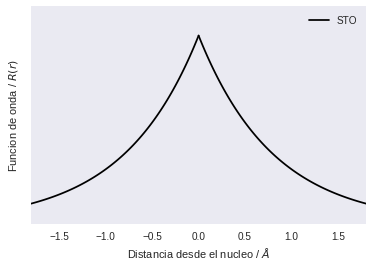

In [19]:
fig, ax = plt.subplots()
ax.plot(x1s, y1s, 'k-', label='STO')
ax.plot(x2s, y2s, 'k-')
ax.set_ylabel("Funcion de onda / $ R ( r ) $")
ax.set_xlabel("Distancia desde el nucleo / $ \AA $")
ax.set_ylim([0, 0.9])
ax.set_xlim([-1.8, 1.8])
ax.set_yticklabels([])
ax.legend()
ax.grid(False)
plt.show()

Dado que los cálculos computacionales ofrecen una visión bastante acertada de lo que sucede con los átomos y las moléculas, se buscó varias alternativas y aproximaciones que lograran hacer que estos se pudieran correr más rápido. La más importante de las aproximaciones fue el aproximar los **STO**s con funciones **gaussianas**.  El problema es que ninguna función gaussiana logra asemejarse del todo a un STO; aproximar un STO con una sola gaussiana no tiene sentido. Es por ello que se utilizó a las gaussianas como *bases* de un espacio vectorial: el de las funciones de onda radiales.

### Orbitales Tipo Gaussiano
Si las gaussianas son las bases del espacio vectorial, entonces es posible construir combinaciones lineales a partir de ellas para aproximarse mejor a los STOs. El problema se torna entonces en ¿*qué gaussianas escoger*? El espacio de soluciones de la ecuación de Schrödinger es un espacio de Hilbert, por lo que existen infinitas bases en él; no existe un conjunto de bases finito que podamos utilizar. Es por ello que lo que se hizo al construir este enfoque fue escoger un número $N$ de gaussianas y realizar regresiones lineales para encontrar sus **coeficientes de contracción** $B_{i}$ y sus **coeficientes exponenciales** $a_{i}$ y así utilizarlas como bases. A los orbitales que se originan de esta manera se les llamó un tiempo **O**rbitales **T**ipo **G**aussiano o GTOs. Hoy en día se les conoce como gaussianas primitivas.

$$GTO \left( r \right) = \sum_{i}^{N} B_{i} x^{a} y^{b} z^{c} e^{-a_{i} \cdot r^2}$$

Al desarrollarse el software de química computacional se pensó que si ya se conoce la forma de la función, y lo importante son los coeficientes, estos últimos se habrían de almacenar en una ubicación determinada (dentro o fuera del programa). A cada colección de coeficientes para modelar los orbitales de uno o varios elementos se les llamó **conjuntos de base**, **sets de base** o simplemente **base**. Un ejemplo de un sitio con muchos sets de bases es [EMSL Basis Set Exchange](https://bse.pnl.gov/bse/portal).

Volviendo al átomo de hidrógeno, no tomó mucho tiempo para que se dieran cuenta que el número de gaussianas no tenía que ser un número grande. Los resultados de utilizar solamente 3 gaussianas fueron satisfactorios por muchos años. Y dado que lo que se estaba intentando era aproximar las STO, el término **STO-*N*G** se comenzó a utilizar en el software para química computacional. Este significa: Base para orbtiales tipo Slater aproximados con *N* gaussianas primitivas.

Para observar cómo es que se aproximó a las STO, vamos a graficar una STO y 3 GTO:
* STO-2G
* STO-3G
* STO-6G

Vamos a comenzar definiendo la función gaussiana.

In [0]:
def GTO(r, a):
  """ Funcion para un orbital tipo gaussiana.
    Parametros:
    r = distancia del electron al nucleo
    a = coeficiente exponencial  """
  return (2 * a / np.pi)**(3./4) * np.exp(-a * r**2)

Ahora, para realizar las combinaciones lineales, vamos a necesitar los coeficientes de cada gaussiana. Ellos los encontramos en [EMSL Basis Set Exchange](https://bse.pnl.gov/bse/portal), y los introducimos en nuestro código.

In [0]:
xg = np.linspace(-2.2,2.2,200)
vGTO = np.vectorize(GTO)
yg2 = 0.4301*vGTO(xg,1.3098) + 0.6789*vGTO(xg,0.2331)
yg3 = 0.1543*vGTO(xg,3.4252) + 0.5353*vGTO(xg,0.6239) + 0.4446*vGTO(xg,0.1688)
yg6 = 0.0091*vGTO(xg,35.5232) + 0.0493*vGTO(xg,6.5131) + 0.1685*vGTO(xg,1.8221) + \
      0.3705*vGTO(xg,0.6259) + 0.4165*vGTO(xg,0.2431) + 0.1303*vGTO(xg,0.1001)

Finalmente graficamos todo junto.

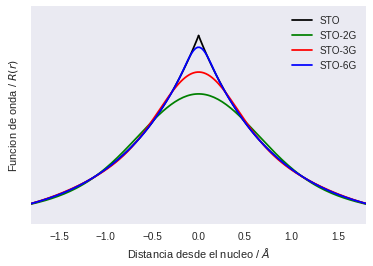

In [22]:
fig, ax = plt.subplots()
ax.plot(x1s, y1s, 'k-', label='STO')
ax.plot(x2s, y2s, 'k-')
ax.plot(xg, yg2, 'g-', label='STO-2G')
ax.plot(xg, yg3, 'r-', label='STO-3G')
ax.plot(xg, yg6, 'b-', label='STO-6G')
ax.set_ylabel("Funcion de onda / $ R ( r ) $")
ax.set_xlabel("Distancia desde el nucleo / $ \AA $")
ax.set_ylim([0, 0.9])
ax.set_xlim([-1.8, 1.8])
ax.set_yticklabels([])
ax.legend()
ax.grid(False)
plt.show()

### Bases
Ya con esta pieza de información, ya comenzamos a entender una parte clave sobre cómo funcionan los programas que realizan cálculos cuánticos. La *base mínima* en muchos programas es la **STO-3G**, pero esta solo se conserva con fines de referencia. Más adelante se realizó otro planteamiento: dado que los electrones de valencia cambian al formar un enlace, mientras que los orbitales internos se mantienen casi igual, ¿podría modelarse los electrones de valencia de otra manera?

De esta idea surgió las bases de valencia dividida o "split-valence". Estas utilizan un número **N** de gaussianas primitivas para los orbitales internos, mientras que los orbitales de valencia los representan mediante combinaciones de diferentes *orbitales*! Cada orbital varía en la carga nuclear efectiva $\zeta$ (zeta griega) utilizada, pues al momento de formar un enlace, esta carga es percibida de diferente manera por el electrón.

Una base muy utilizada aún hoy día es la 6-31G, lo cual significa 6 gaussianas para los orbitales internos, y una combinación de:

* un orbital de 3 gaussianas
* un orbital de 1 gaussiana

para cada orbital de valencia.

El hecho de que esta base utiliza dos orbitales para construir el orbital de valencia, implica que utiliza dos valores de $\zeta$. Por esta razón, la base es llamada de **doble zeta**. Existen bases triple-zeta, cuádruple-zeta, etc. Además de ello, es posible incluir funciones para que los electrones en una molécula sean polarizables o difusos según sea necesario, pero esto ya es tema para otro curso.

## El Átomo de Hidrógeno en química computacional
Para finalizar, vamos a realizar el cálculo del átomo de hidrógeno con base STO-3G en Orca. Para ello vamos a crear un documento de texto `H.inp` en nuestro ordenador y vamos a ingresarle el siguiente texto:

`! HF STO-3G`

`* xyz 0 2`

    H        0.00000        0.00000        0.00000

`*`

Aquí le hemos ordenado a Orca que utilice el método de Hartree-Fock (se verá en el siguiente laboratorio) y la base STO-3G para determinar la energía basal del átomo de hidrógeno con coordenadas 0, 0, 0 en $x$, $y$ y $z$ respectivamente. Para realizar el cálculo se debe abrir una línea de comando (Terminal), cambiar el directorio hacia donde se encuentra nuestro documento `H.inp` y ejecutar el siguiente comando:

`orca H.inp > H.out`

Después de unos segundos el cálculo habrá terminado. Entonces nos dispondremos a revisar el documento `H.out` buscando la línea: `TOTAL SCF ENERGY`. Anotaremos la energía total en $eV$ encontrada allí y la vamos a comparar con la energía basal del átomo de hidrógeno que determinaremos a continuación:

In [0]:
# Energia del atomo de hidrogeno
def E_h(n):
    a = -1 * cnts.m_e * cnts.e**4
    d = ( 8 * cnts.h**2 * cnts.epsilon_0**2 * n**2)
    return (a / d) / cnts.value("electron volt")

In [24]:
E_h(1)

-13.605693012183629